# DATA EXPLORATION

In [14]:
import pandas as pd

# Load dataset
df_initial = pd.read_csv("../data/Model_data/uber.csv", header=0)  # Change this to your dataset path

df_initial.describe()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


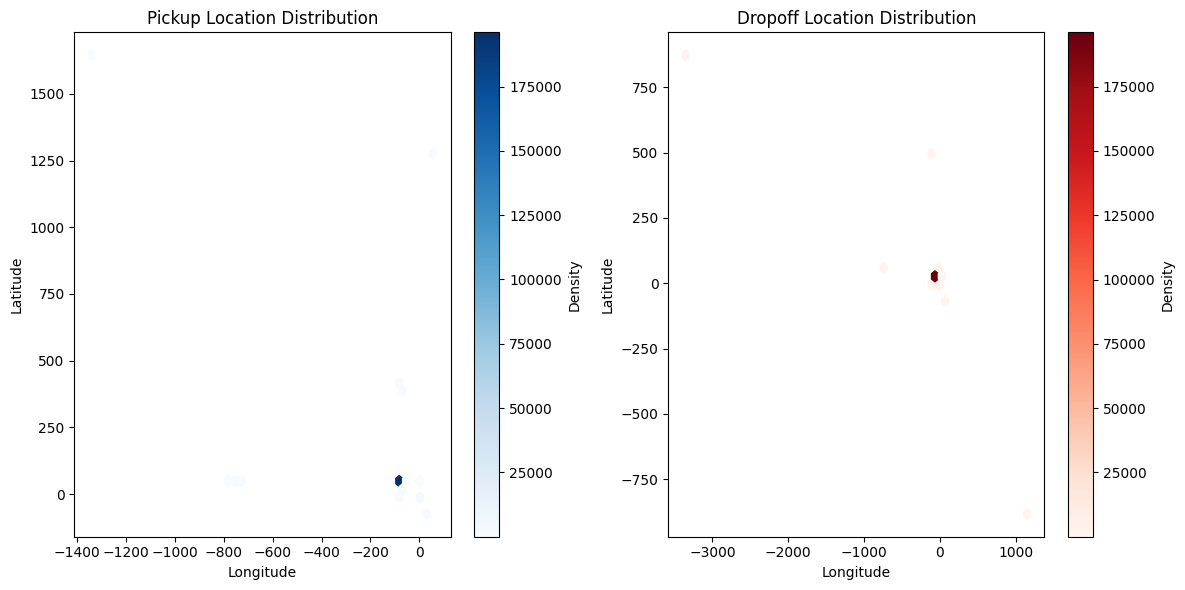

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Pickup Locations - Hexbin Plot
plt.subplot(1, 2, 1)
plt.hexbin(df_initial["pickup_longitude"], df_initial["pickup_latitude"], gridsize=50, cmap="Blues", mincnt=1)
plt.title("Pickup Location Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Density")

# Dropoff Locations - Hexbin Plot
plt.subplot(1, 2, 2)
plt.hexbin(df_initial["dropoff_longitude"], df_initial["dropoff_latitude"], gridsize=50, cmap="Reds", mincnt=1)
plt.title("Dropoff Location Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Density")

plt.tight_layout()
plt.show()



In [7]:
cols = ["fare_amount", "passenger_count"]

variance = df_initial[cols].var()
std_dev = df_initial[cols].std()

print("Variance:\n", variance)
print("\nStandard Deviation:\n", std_dev)

Variance:
 fare_amount        98.045172
passenger_count     1.920986
dtype: float64

Standard Deviation:
 fare_amount        9.901776
passenger_count    1.385997
dtype: float64


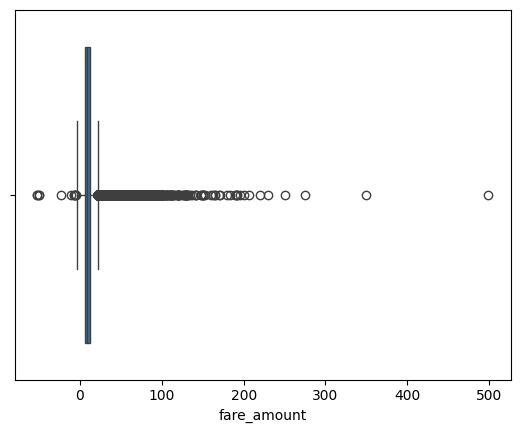

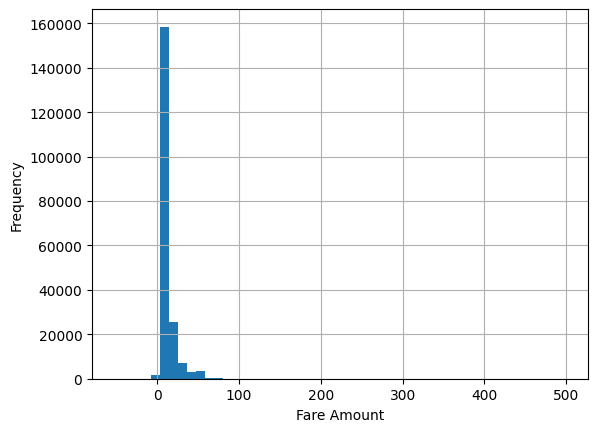

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_initial["fare_amount"])
plt.show()

df_initial["fare_amount"].hist(bins=50)
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

In [11]:
df_initial.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


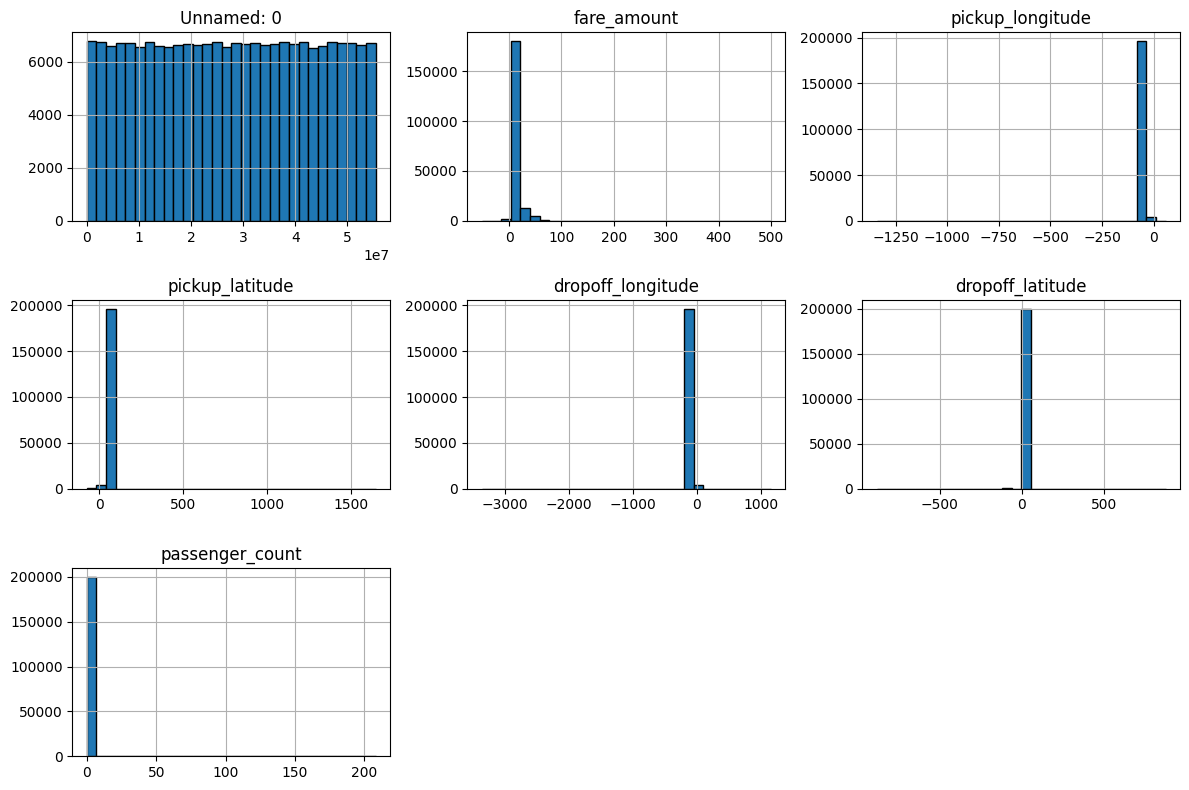

In [17]:
import matplotlib.pyplot as plt

df_initial.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


# DATA CLEANING 

In [60]:
df_NAN_removed = df_initial.dropna()
df_col_removed = df_NAN_removed.iloc[:, 1:]
df_NAN_removed = df_col_removed.drop(columns=['pickup_datetime','key'])
df_NAN_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 10.7 MB


In [61]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[40.7, -74.0], zoom_start=12)
m1 = folium.Map(location=[40.7, -74.0], zoom_start=12)

heat_data = list(zip(df_NAN_removed["pickup_latitude"], df_NAN_removed["pickup_longitude"]))
HeatMap(heat_data, radius=10).add_to(m)

heat_data = list(zip(df_NAN_removed["dropoff_latitude"], df_NAN_removed["dropoff_longitude"]))
HeatMap(heat_data, radius=10).add_to(m1)

# Show the map
m.save("../Docs/Map_Docs/Ganga_Maps/initial_heatmap_pickup.html")
m1.save("../Docs/Map_Docs/Ganga_Maps/initial_heatmap_dropoff.html")
print("Successfully created heat maps")

Successfully created heat maps


In [62]:
# removing rows that have'0'
df_without_0 = df_NAN_removed.mask(df_NAN_removed == 0).dropna()
df_without_0.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195342.000000,195342.000000,195342.000000,195342.000000,195342.000000,195342.000000
mean,11.350196,-73.929892,40.705428,-73.916906,40.688365,1.691152
std,9.808223,5.458969,5.436405,8.533219,4.001301,1.386991
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992268,40.736392,-73.991592,40.735266,1.000000
50%,8.500000,-73.982102,40.753277,-73.980523,40.753724,1.000000
75%,12.500000,-73.968317,40.767540,-73.965317,40.768320,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [63]:
# removing rows which have fare amount < 0
df_cleaned_fare = df_without_0[df_without_0['fare_amount'] >= 0]
df_cleaned_fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195326.000000,195326.000000,195326.000000,195326.000000,195326.000000,195326.000000
mean,11.352339,-73.929889,40.705424,-73.916900,40.688359,1.691127
std,9.804426,5.459193,5.436628,8.533568,4.001465,1.386989
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992269,40.736392,-73.991592,40.735268,1.000000
50%,8.500000,-73.982102,40.753277,-73.980522,40.753724,1.000000
75%,12.500000,-73.968318,40.767540,-73.965317,40.768320,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [67]:
# deleting cols which have 0 in lat, long data
df_cleaned_fare = df_cleaned_fare.mask(geo_data == 0).dropna()

# defining valid geographic bounds
df_cleaned_geo = df_cleaned_fare[
    (df_cleaned_fare['pickup_longitude'].between(-180, 180)) &
    (df_cleaned_fare['pickup_latitude'].between(-90, 90)) &
    (df_cleaned_fare['dropoff_longitude'].between(-180, 180)) &
    (df_cleaned_fare['dropoff_latitude'].between(-90, 90))]

df_cleaned_geo = df_cleaned_geo.reset_index(drop=True)
df_cleaned_geo.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195314.000000,195314.000000,195314.000000,195314.000000,195314.000000,195314.000000
mean,11.352295,-73.903512,40.687098,-73.902974,40.686503,1.691128
std,9.804531,2.780518,2.651655,2.771100,2.657013,1.386994
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000
25%,6.000000,-73.992268,40.736392,-73.991592,40.735270,1.000000
50%,8.500000,-73.982101,40.753277,-73.980521,40.753724,1.000000
75%,12.500000,-73.968318,40.767537,-73.965315,40.768320,2.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000


<Figure size 1200x800 with 0 Axes>

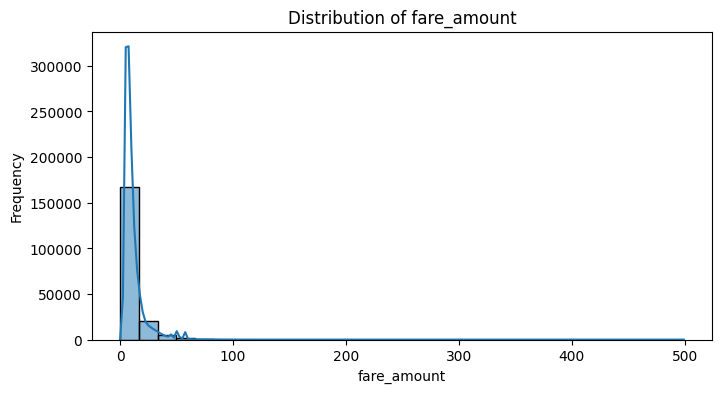

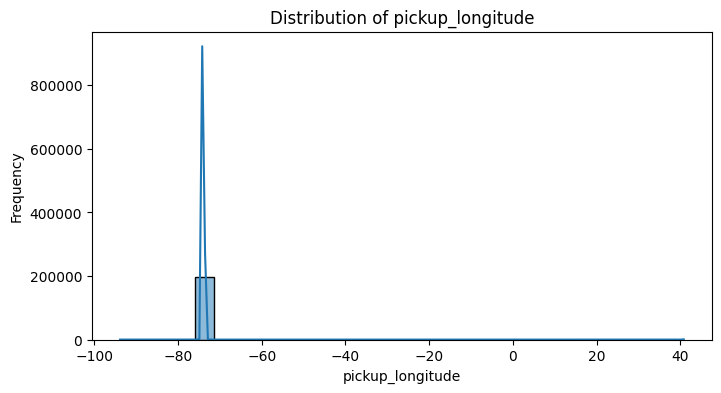

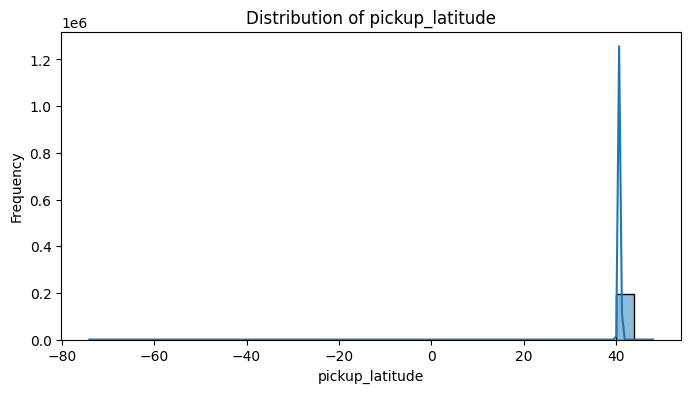

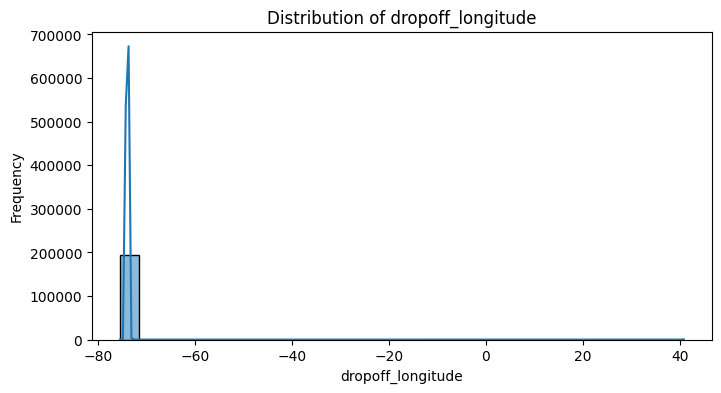

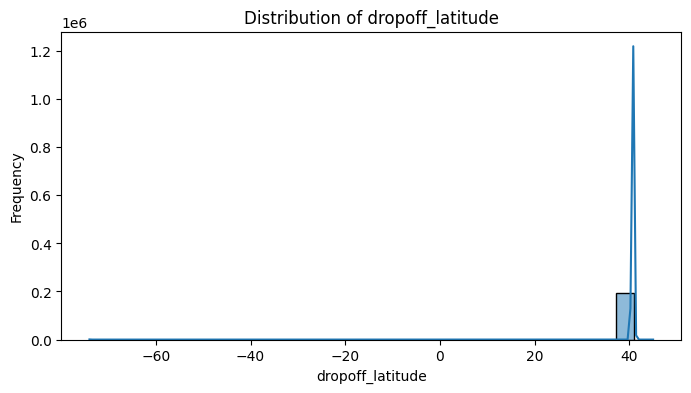

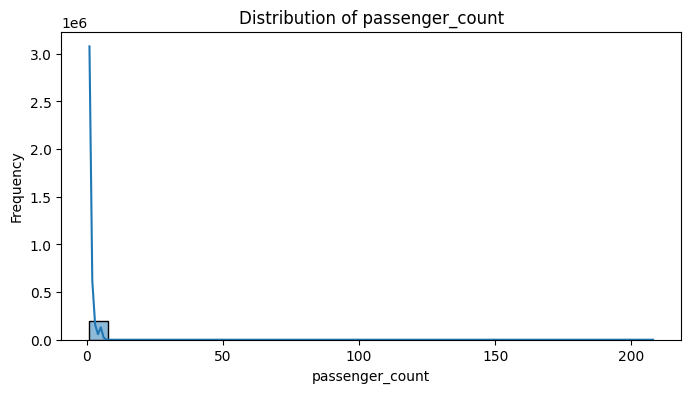

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df_cleaned_geo.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned_geo[col], bins=30, kde=True, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

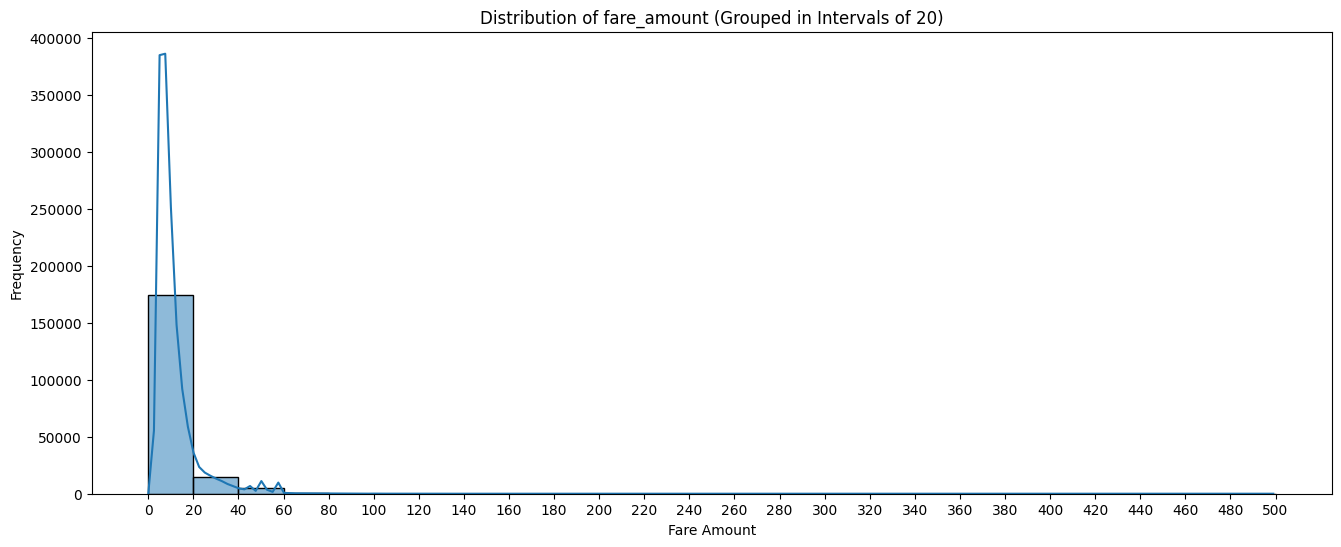

In [101]:
bin_edges = range(0, int(df_cleaned_geo.fare_amount.max()) + 20, 20)
plt.figure(figsize=(16,6))
sns.histplot(df_cleaned_geo.fare_amount, bins=bin_edges, kde=True, edgecolor="black")
plt.title("Distribution of fare_amount (Grouped in Intervals of 20)")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.xticks(bin_edges)  
plt.show()

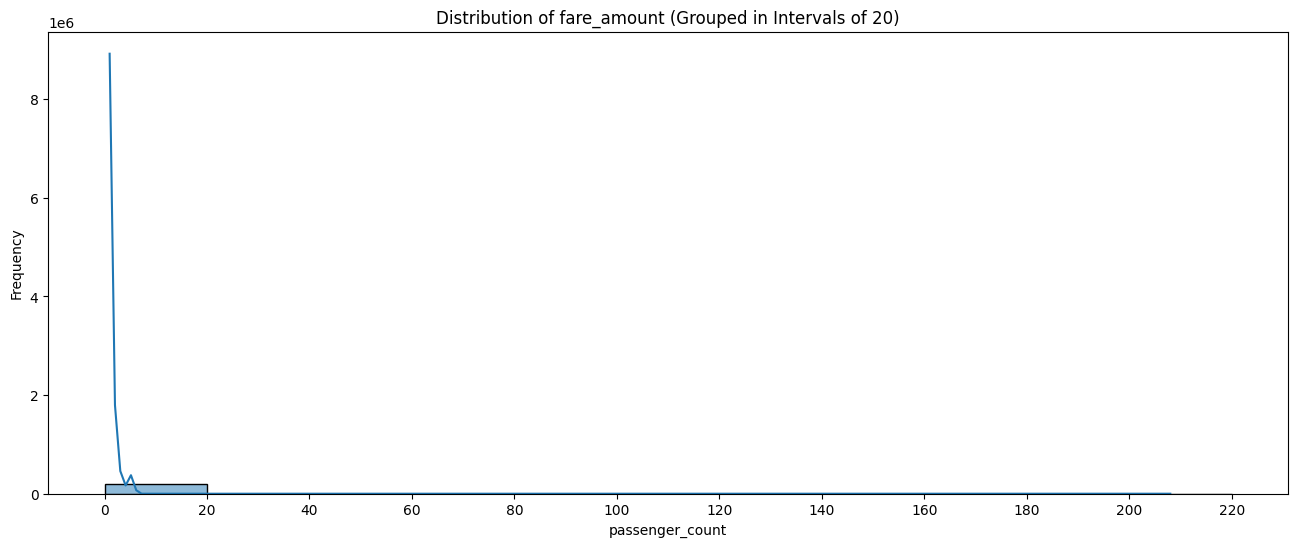

In [104]:
bin_edges = range(0, int(df_cleaned_geo.passenger_count.max()) + 20, 20)
plt.figure(figsize=(16,6))
sns.histplot(df_cleaned_geo.passenger_count, bins=bin_edges, kde=True, edgecolor="black")
plt.title("Distribution of fare_amount (Grouped in Intervals of 20)")
plt.xlabel("passenger_count")
plt.ylabel("Frequency")
plt.xticks(bin_edges)  
plt.show()

In [106]:
df_cleaned_price = df_cleaned_geo[df_cleaned_geo['fare_amount'] <= 40]
df_cleaned_price = df_cleaned_price.reset_index(drop=True)

df_cleaned_price_passenger = df_cleaned_price[df_cleaned_price['passenger_count'] <= 20]
df_cleaned_price_passenger = df_cleaned_price_passenger.reset_index(drop=True)

df_cleaned_price_passenger.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,189816.000000,189816.000000,189816.000000,189816.000000,189816.000000,189816.000000
mean,10.139391,-73.908399,40.690567,-73.906812,40.689994,1.688425
std,6.340085,2.728985,2.598290,2.719020,2.602337,1.305402
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000
25%,6.000000,-73.992397,40.737047,-73.991602,40.736207,1.000000
50%,8.100000,-73.982268,40.753561,-73.980658,40.754036,1.000000
75%,12.100000,-73.969122,40.767663,-73.966050,40.768423,2.000000
max,40.000000,40.808425,48.018760,40.831932,45.031598,6.000000


In [107]:
geo_cols = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_cleaned_price_passenger[geo_cols].quantile(0.15)
Q3 = df_cleaned_price_passenger[geo_cols].quantile(0.85)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df_cleaned_price_passenger[geo_cols] < lower_bound) | (df_cleaned_price_passenger[geo_cols] > upper_bound)).any(axis=1)

df_cleaned = df_cleaned_price_passenger[~outliers]

# Create a base map centered around a reasonable location
m = folium.Map(location=[40.7, -74.0], zoom_start=12)

# Add HeatMap for pickups
heat_data = list(zip(df_cleaned["pickup_latitude"], df_cleaned["pickup_longitude"]))
HeatMap(heat_data, radius=10).add_to(m)

# Show the map
m.save("../Docs/Map_Docs/Ganga_Maps/Testing_Cleaned_3.html")
print("Successfully created heat maps")

Successfully created heat maps


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189817 entries, 0 to 189816
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        189817 non-null  float64
 1   pickup_longitude   189817 non-null  float64
 2   pickup_latitude    189817 non-null  float64
 3   dropoff_longitude  189817 non-null  float64
 4   dropoff_latitude   189817 non-null  float64
 5   passenger_count    189817 non-null  float64
dtypes: float64(6)
memory usage: 8.7 MB
<class 'pandas.core.frame.DataFrame'>
Index: 179971 entries, 0 to 189815
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        179971 non-null  float64
 1   pickup_longitude   179971 non-null  float64
 2   pickup_latitude    179971 non-null  float64
 3   dropoff_longitude  179971 non-null  float64
 4   dropoff_latitude   179971 non-null  float64
 5   passe

<Figure size 1200x800 with 0 Axes>

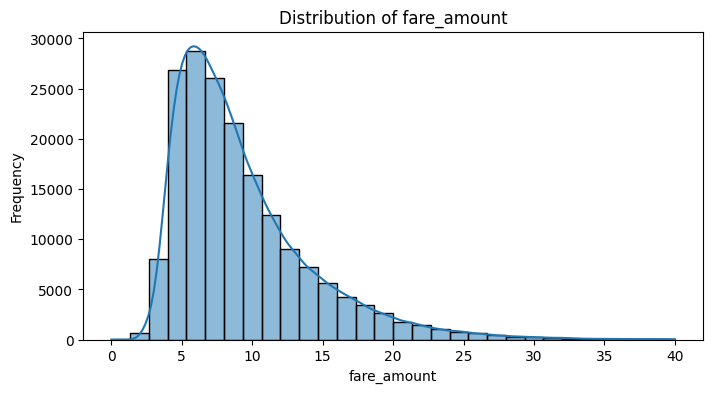

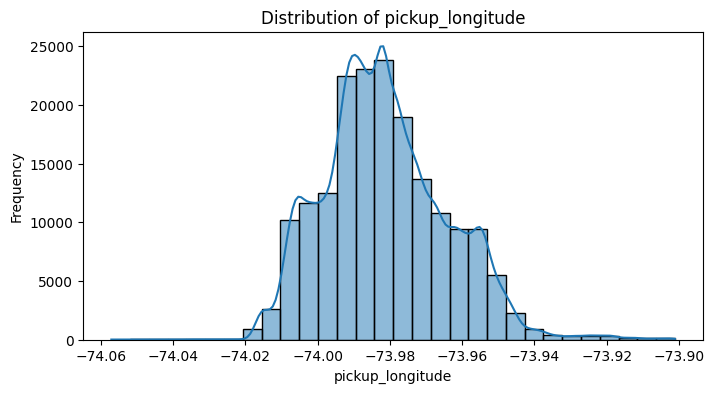

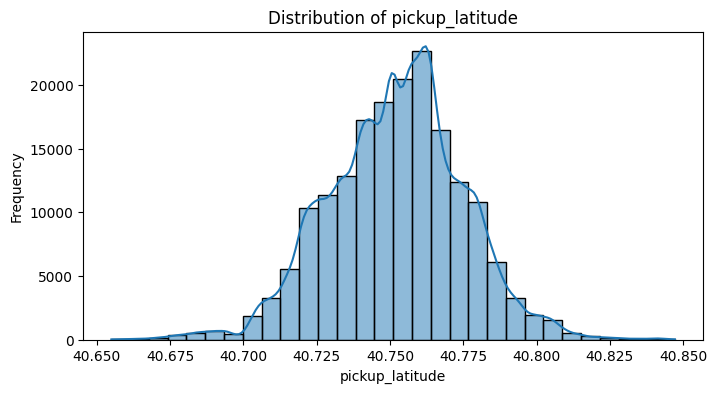

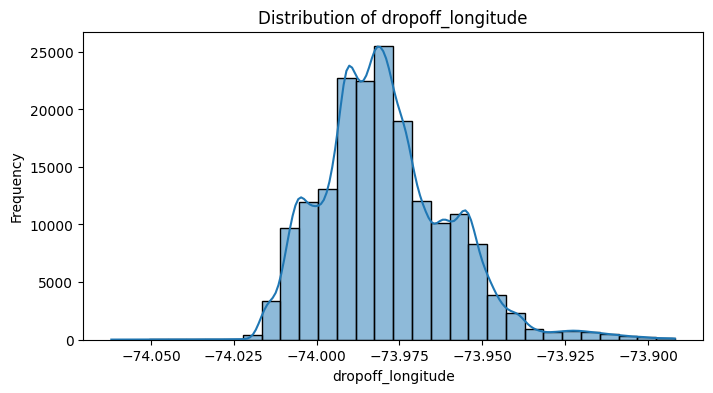

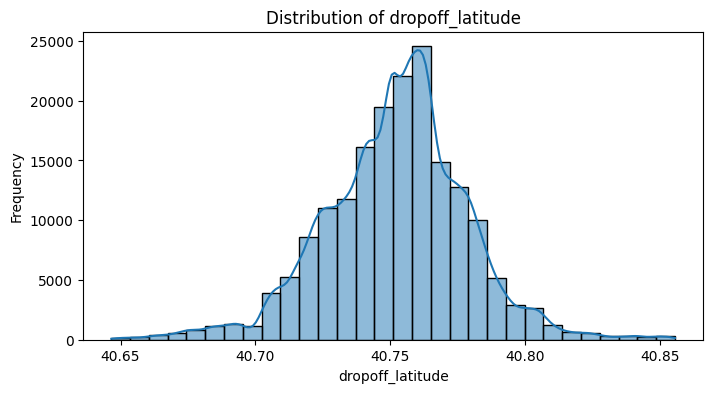

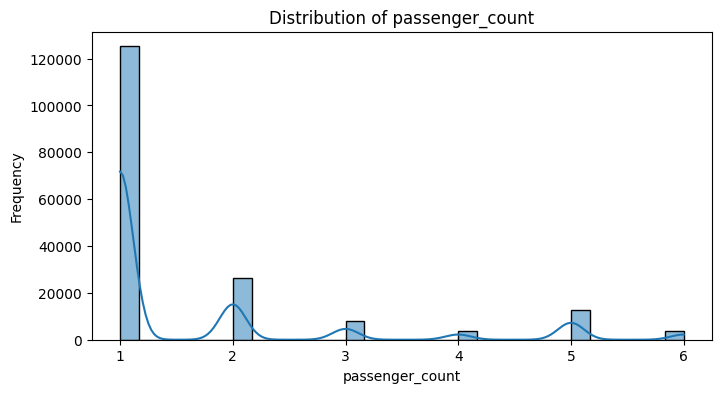

In [108]:
df_cleaned_price.info()
df_cleaned.info()

numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col], bins=30, kde=True, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [26]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans
from shapely.geometry import MultiPoint, Polygon


# Combine pickup and drop-off locations
pickup_points = df_cleaned[['pickup_longitude', 'pickup_latitude']].values
# dropoff_points = geo_data[['dropoff_longitude', 'dropoff_latitude']].values
# all_points = np.vstack((pickup_points, dropoff_points))  # Merge all coordinates

# Apply K-Means Clustering
num_clusters = 5  # Adjust based on dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(pickup_points)
cluster_centers = kmeans.cluster_centers_

# Create a Folium map
map_center = [np.mean(pickup_points[:, 1]), np.mean(pickup_points[:, 0])]
m = folium.Map(location=map_center, zoom_start=12)

# Add clustered data points to the map
marker_cluster = MarkerCluster().add_to(m)
for point, label in zip(pickup_points, labels):
    folium.Marker(
        location=[point[1], point[0]], 
        icon=folium.Icon(color="blue"),
        popup=f"Cluster {label}"
    ).add_to(marker_cluster)

# Convert clusters into polygons
for cluster_label in range(num_clusters):
    cluster_points = pickup_points[labels == cluster_label]  # Get points for each cluster
    if len(cluster_points) >= 3:  # Convex hull requires at least 3 points
        polygon = MultiPoint(cluster_points).convex_hull  # Create convex hull
        polygon_coords = [(lat, lon) for lon, lat in polygon.exterior.coords]  # Convert to lat/lon

        # Add polygon to the map
        folium.Polygon(
            locations=polygon_coords,
            color="red",
            fill=True,
            fill_color="red",
            fill_opacity=0.3,
            popup=f"Cluster {cluster_label} Polygon"
        ).add_to(m)

# Save map to an HTML file
m.save("taxi_clusters_with_polygons.html")
print("Map saved as taxi_clusters_with_polygons.html. Open it in a browser to view.")




Map saved as taxi_clusters_with_polygons.html. Open it in a browser to view.
